# Лабораторна робота *№3*
# Студента групи МІТ-31 - підгрупа 1
# **Зименка Данііла Миколайовича**

## Завдання
_______________________________________________________________________________________________________________________________
 1. Створити набір даних за допомогою [DatasetGenerator](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

   2. Завантажити набір даних для регресії на [сайті](https://www.kaggle.com/datasets?search=classification) (у кожного студента має бути інший - прошу організуватись відповідним чином)

   3. (опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.

   4. Для отриманих наборів даних провести встановленні кроки моделювання.

   5. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.
_______________________________________________________________________________________________________________________________

## Внесемо деякі імпорти


In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.datasets import make_classification
import random
import pylab as pl


from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.cm as cm

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.621357,-0.466162,-0.876004,1.048546,0.246883,0.102552,0.182802,-0.734633,-0.612607,-0.781579,...,-0.963609,-0.416772,0.387791,-0.801569,1.367483,0.317131,-0.200914,0.326476,-1.021426,0.0
1,1.459487,-0.565868,-0.644315,-0.731295,-2.071762,-0.177884,0.034947,2.596015,0.937319,-0.639274,...,-0.291779,-0.698339,0.072470,-2.981920,0.313027,-1.094245,-1.722557,-0.565848,1.385291,1.0
2,-2.095624,1.435589,-1.899643,-1.873413,-0.234656,-0.546632,-0.628275,0.817281,0.319974,-0.856306,...,0.560765,0.124764,0.923996,1.514221,0.739420,1.205956,-0.889094,-0.039322,0.921998,0.0
3,0.173108,-1.723354,0.823400,0.915793,-3.069207,-0.881015,-1.652493,-1.065279,-1.886600,-0.881016,...,1.513925,-0.076169,-0.318885,-0.848412,-0.676689,-0.013445,-0.094366,-0.065277,0.071754,0.0
4,1.141644,-1.074191,-1.270499,-0.537251,-0.313907,0.790261,-1.306579,0.810379,0.078028,-0.104193,...,0.168928,1.044931,0.335648,-1.982269,-1.228091,-0.955047,0.805057,-0.586513,0.891812,1.0
5,1.654611,-1.101671,-0.403811,-1.250409,-1.689730,-0.916862,-1.409235,0.405287,-0.426503,1.996217,...,-0.538652,1.594366,-0.036720,1.101581,-0.754873,-1.198305,-0.126080,0.177429,-0.449583,1.0
6,2.702735,1.755823,0.763786,-0.068669,-1.115688,0.387427,-0.254002,0.605734,-1.294427,-0.620989,...,0.254870,-0.506762,-0.578009,-0.461022,-0.509426,-1.773342,-0.651995,-1.612183,-1.329613,1.0
7,-0.413311,1.381349,-0.167644,0.689357,-0.443891,-0.569338,1.698623,-0.458872,-1.201517,0.234595,...,-1.832290,-1.320544,0.106895,0.175222,0.460638,0.264611,-0.806366,-0.531618,-0.602577,0.0
8,0.368997,0.802151,0.546005,0.865166,-2.605125,-1.494803,-1.063472,-2.119906,-1.652489,-0.983492,...,-0.557662,0.864793,-0.239676,-0.669485,0.988320,-0.184997,0.213683,0.863674,-1.261665,2.0
9,-2.023844,1.017975,1.546028,0.228399,0.750219,-0.788482,0.656364,-0.775900,0.751749,-0.472041,...,0.373173,-0.625682,-0.337988,-0.316405,0.338571,1.601742,0.482142,0.068973,0.473173,2.0


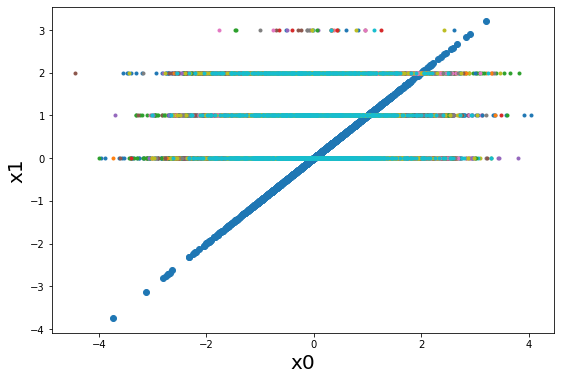

In [30]:
X, y = datasets.make_classification(n_samples=1128, n_classes=4,
                                    n_clusters_per_class=1, weights=[0.5, 0.3, 0.2], random_state=0)
fig, ax = plt.subplots(figsize=(9, 6))
plt.xlabel("x0", fontsize=20)
plt.ylabel("x1", fontsize=20)
plt.scatter(X[:,1], X[:,1])

plt.ion() 
plt.plot(X,y,'.',label='training data')

df = pd.DataFrame(np.c_[X, y])
df.to_csv('./finishData.csv', index=None)
DataRead = pd.read_csv("./finishData.csv")
DataRead.head(19)

In [32]:
col = []
X_num = []
Y_num = []
coef_array = []

for i in range(1000):
    X_num.append(random.uniform(-3.0, 3.0))
    Y_num.append(random.uniform(-250.0, 250.0))

col.append(X_num)
col.append(Y_num)

data = pd.DataFrame(data={'X':col[0],'Y':col[1]})
data.to_csv('./resultsOfData.csv', index=None, columns=['X', 'Y'])

In [53]:
data = pd.read_csv("./COVID-19-in-Ukraine-from-April.csv")
data.head(200)

,dates,confirmed,deaths,recovered,existing,n_confirmed,n_deaths,n_recovered,n_existing
0,2020-04-01,794,20,13,761,149,3,3,143
1,2020-04-02,897,22,19,856,103,2,6,95
2,2020-04-03,1072,27,23,1022,175,5,4,166
3,2020-04-04,1225,32,25,1168,153,5,2,146
4,2020-04-05,1251,37,28,1186,26,5,3,18
...,...,...,...,...,...,...,...,...,...
195,2020-10-13,270587,5122,116562,148903,5133,107,2152,2874
196,2020-10-14,276177,5229,118699,152249,5590,107,2137,3346
197,2020-10-15,281239,5302,119650,156287,5062,73,951,4038
198,2020-10-16,287231,5408,121919,159904,5992,106,2269,3617


In [34]:
print(data.shape)

(200, 9)


In [40]:
print(data['confirmed'].unique())

[   794    897   1072   1225   1251   1319   1462   1668   1892   2227
   2511   2801   3104   3420   3764   4161   4662   5106   5449   5710
   6125   6592   7170   7647   8125   8617   9009   9410   9866  10406
  10861  11411  11913  12331  12697  13184  13691  14195  14710  15232
  15648  16023  16425  16847  17330  17858  18291  18616  18876  19230
  19706  20148  20580  20986  21245  21584  21905  22382  22811  23204
  23672  24012  24340  24823  25411  25964  26514  26999  27462  27856
  28381  29070  29753  30506  31154  31810  32476  33234  34063  34984
  35825  36560  37241  38074  39014  40008  41117  42065  42982  43628
  44334  44998  45887  46763  47677  48500  49043  49607  50414  51224
  52043  52843  53521  54133  54771  55607  56455  57264  58111  58842
  59493  60166  60995  61851  62823  63929  64849  65656  66575  67597
  68794  69884  71056  72168  73158  74219  75490  76808  78261  79750
  80949  81957  83115  84548  86140  87872  89719  91356  92820  94436
  9640

In [41]:
print(data.groupby('deaths').size())

deaths
20      1
22      1
27      1
32      1
37      1
       ..
5122    1
5229    1
5302    1
5408    1
5517    1
Length: 200, dtype: int64


E:\Study\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


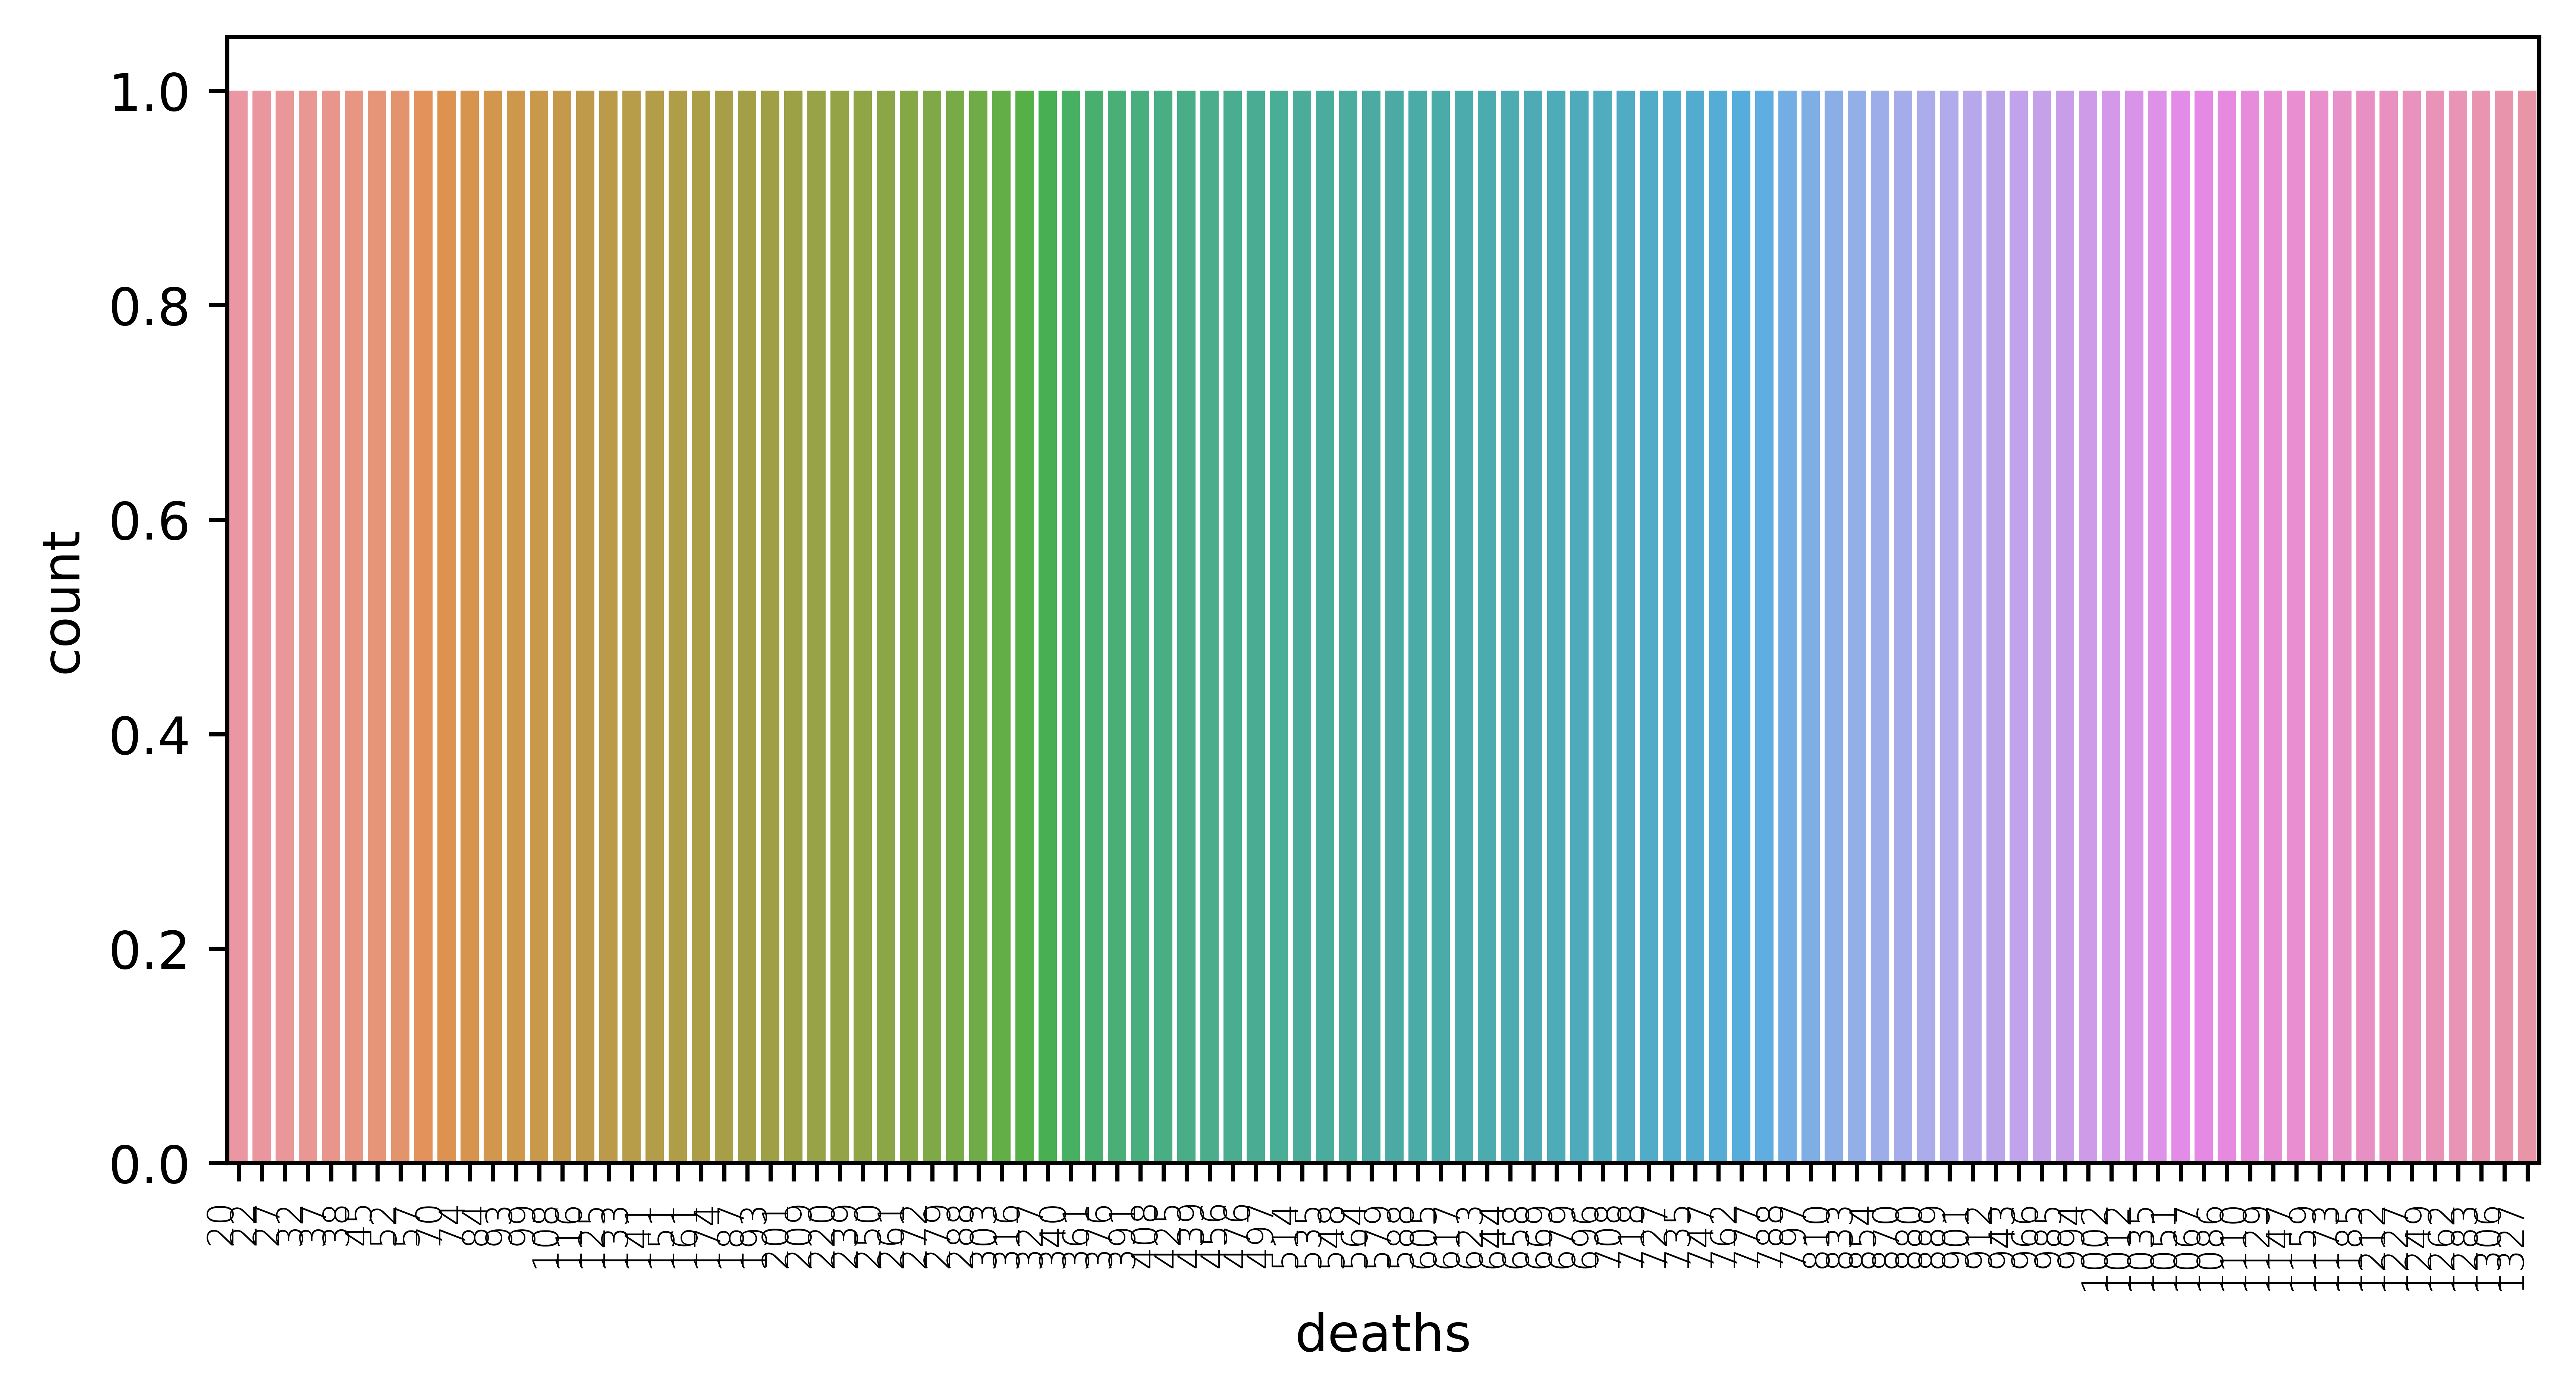

In [54]:
plt.figure(figsize = (8,4), dpi = 1000)
sns.countplot(data["deaths"][0:100])
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-small')
plt.show()

In [55]:
plt.figure(figsize = (16,8), dpi = 1000)
sns.countplot(data["deaths"][100:200])
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-small')
plt.show()

E:\Study\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


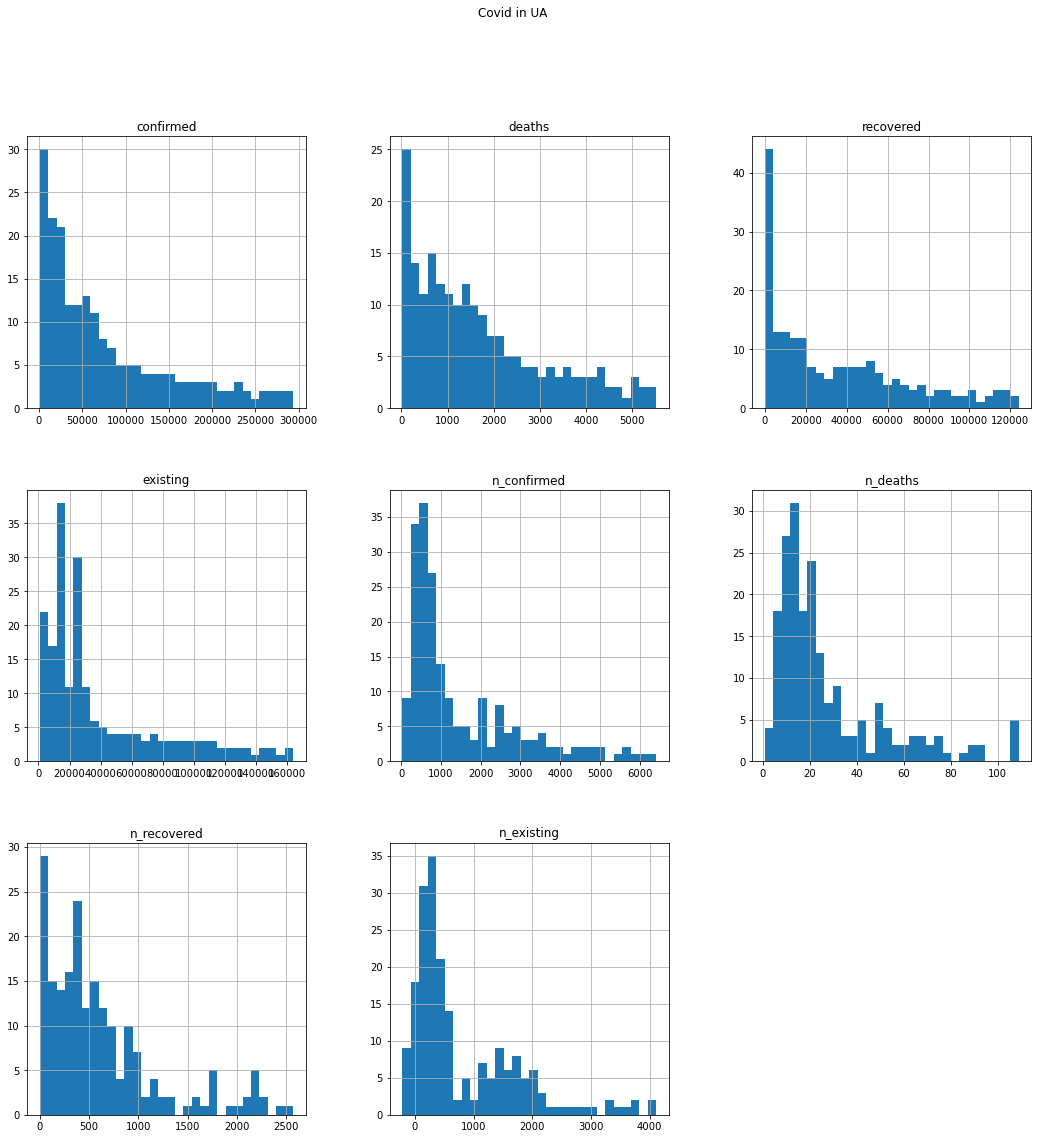

In [56]:
New_data = data
New_data.drop('deaths' ,axis=1)
New_data.hist(bins=30, figsize=(18,18))
pl.suptitle("Covid in UA")
plt.show()


Text(0.5, 0.98, 'Scatter-matrix for each input variable')

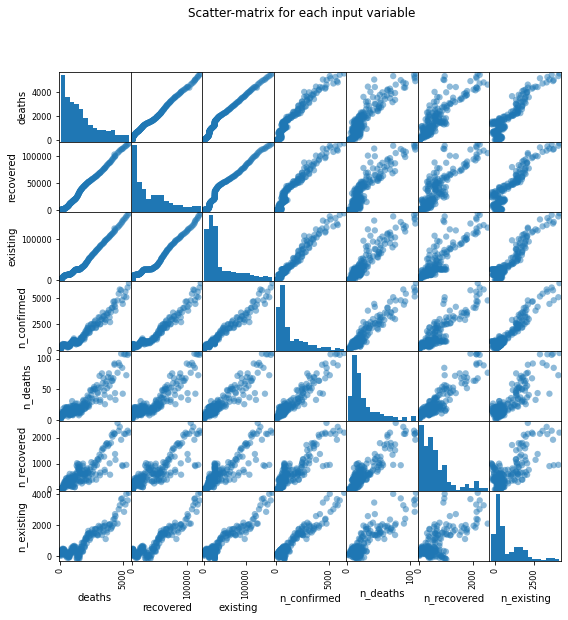

In [61]:

feature_names = ['deaths', 'recovered','existing','n_confirmed','n_deaths', 'n_recovered','n_existing']
X = New_data[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')



In [62]:
data.describe(percentiles = [.20, .40, .60, .80])

,confirmed,deaths,recovered,existing,n_confirmed,n_deaths,n_recovered,n_existing
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000
mean,99.500000,1686.215000,35196.755000,40540.04000,1464.980000,27.500000,620.51500,816.965000
std,57.879185,1418.948988,33819.879231,40315.48501,1423.499375,23.838864,583.47903,920.727637
min,0.000000,20.000000,13.000000,761.00000,26.000000,1.000000,0.00000,-215.000000
20%,39.800000,404.600000,3242.400000,11917.80000,432.800000,11.000000,149.00000,144.800000
40%,79.600000,990.400000,16256.800000,18241.40000,665.200000,15.600000,356.60000,309.000000
50%,99.500000,1336.000000,24292.000000,26029.50000,831.000000,19.000000,436.50000,402.000000
60%,119.400000,1659.200000,37698.000000,28718.60000,1037.600000,22.000000,582.20000,564.400000
80%,159.200000,2888.400000,62794.000000,72867.80000,2483.800000,43.200000,937.60000,1525.600000
max,199.000000,5517.000000,124113.000000,164011.00000,6410.000000,109.000000,2569.00000,4107.000000


In [63]:
ord_enc = OrdinalEncoder()
data['confirmed'] = ord_enc.fit_transform(data[['deaths']])
y = data['confirmed']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dates        200 non-null    object 
 1   confirmed    200 non-null    float64
 2   deaths       200 non-null    int64  
 3   recovered    200 non-null    int64  
 4   existing     200 non-null    int64  
 5   n_confirmed  200 non-null    int64  
 6   n_deaths     200 non-null    int64  
 7   n_recovered  200 non-null    int64  
 8   n_existing   200 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 14.2+ KB


In [65]:
updated_df = df.dropna(axis=1)
updated_df.info()

y = updated_df[20]


X_train, X_test,y_train,y_test = train_test_split(updated_df,y)
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1128 non-null   float64
 1   1       1128 non-null   float64
 2   2       1128 non-null   float64
 3   3       1128 non-null   float64
 4   4       1128 non-null   float64
 5   5       1128 non-null   float64
 6   6       1128 non-null   float64
 7   7       1128 non-null   float64
 8   8       1128 non-null   float64
 9   9       1128 non-null   float64
 10  10      1128 non-null   float64
 11  11      1128 non-null   float64
 12  12      1128 non-null   float64
 13  13      1128 non-null   float64
 14  14      1128 non-null   float64
 15  15      1128 non-null   float64
 16  16      1128 non-null   float64
 17  17      1128 non-null   float64
 18  18      1128 non-null   float64
 19  19      1128 non-null   float64
 20  20      1128 non-null   float64
dtypes: float64(21)
memory usage: 185.2 KB

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99


In [67]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [68]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.79


In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.78
Accuracy of LDA classifier on test set: 0.78


In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [71]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [72]:

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[127  22   0]
 [ 19  58   3]
 [  8   6  39]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       149
         1.0       0.67      0.72      0.70        80
         2.0       0.93      0.74      0.82        53

    accuracy                           0.79       282
   macro avg       0.81      0.77      0.79       282
weighted avg       0.80      0.79      0.80       282



In [73]:
X_train[0]

772     0.791561
9      -2.023844
1115   -2.642630
595    -3.073352
777    -2.422146
          ...   
33     -0.059046
1061   -1.758632
509     0.757071
816    -0.510141
470    -0.866876
Name: 0, Length: 846, dtype: float64

<ipython-input-75-e0b41c6027c4>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


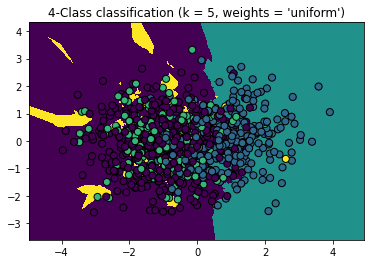

In [75]:
X_train, X_test, y_train, y_test = train_test_split(updated_df, y)

def plot_life_knn(X, y, n_neighbors, weights):
    X_mat = X[[0,3]].values
    y_mat = y.values

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)


    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
        
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                            np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z)

    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()

plot_life_knn(X_train, y_train, 5, 'uniform')